# Method 1
## Approach for PCB Defect Detection

To detect PCB defects, the following approach was used:

1. **Data**: A dataset of PCB images, including both defective and defect-free images, was provided by the organization.

2. **Bounding Box Extraction**: For each defective image, the bounding boxes for defects were extracted. This provides the model with the spatial location of the defects within the images.

3. **Text File Annotation Format**: The bounding box annotations were stored in text files. Each text file corresponds to an image and contains information about the defects in that image. The format of the annotation file is as follows:
    - **class_id**: The class label for the defect (e.g., 0 for defect, 1 for non-defect).
    - **x_center**: The x-coordinate of the center of the bounding box.
    - **y_center**: The y-coordinate of the center of the bounding box.
    - **width**: The width of the bounding box.
    - **height**: The height of the bounding box.

    The format of each line in the `.txt` annotation file is:
    

4. **Model**: The YOLOv8m model will be used for detecting PCB defects. YOLOv8m is a version of the YOLO (You Only Look Once) model designed for high-speed and efficient object detection tasks.

5. **Folder Structure**: The dataset is organized in the following folder structure:

    ```
    dataset/
    │
    ├── images/                
    │   ├── image1.jpg
    │   ├── image2.jpg
    │   ├── image3.jpg
    │   └── ...
    │
    └── labels/           
        ├── image1.txt
        ├── image2.txt
        ├── image3.txt
        └── ...
    ```

This structure ensures that the image files and their corresponding annotations are clearly separated and organized for training the YOLOv8m model for defect detection.


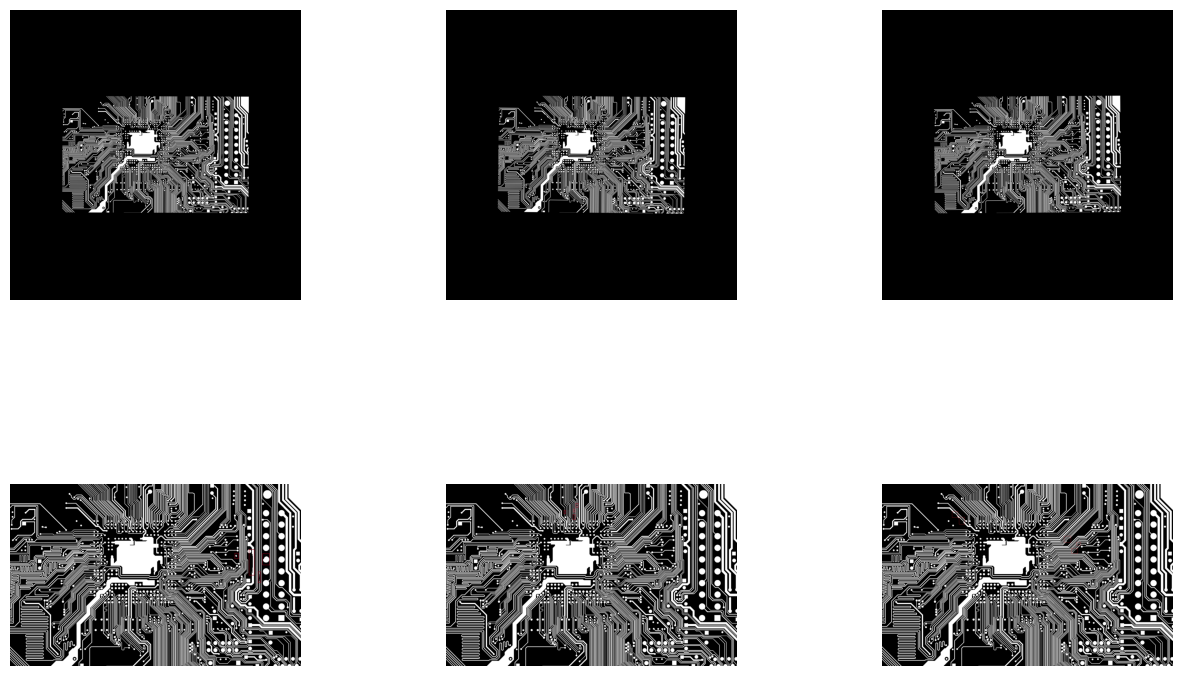

In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Function to load and visualize 5 images from each of two directories
def visualize_images_from_two_folders(folder1, folder2, rows=2, cols=3):
    
    # List all image files in both directories
    image_files_folder1 = [f for f in os.listdir(folder1) if f.endswith(('.png', '.jpg', '.jpeg'))]
    image_files_folder2 = [f for f in os.listdir(folder2) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Take only the first 5 images from each folder
    image_files_folder1 = image_files_folder1[:3]
    image_files_folder2 = image_files_folder2[:7]

    # Initialize a list to hold the images
    images = []

    # Load images from folder1
    for image_file in image_files_folder1:
        img_path = os.path.join(folder1, image_file)
        img = Image.open(img_path)
        images.append(np.array(img))

    # Load images from folder2
    for image_file in image_files_folder2:
        img_path = os.path.join(folder2, image_file)
        img = Image.open(img_path)
        images.append(np.array(img))

    # Plot the images
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    axes = axes.ravel()

    for i in np.arange(0, len(images)):
        axes[i].imshow(images[i])
        axes[i].axis('off')

    plt.subplots_adjust(wspace=0.5)
    plt.show()

# Example usage:
folder1 = '/kaggle/input/yolo-val-data/yolo_final_data/images/train'  
folder2 = '/kaggle/input/highlight-image/highlight' 
visualize_images_from_two_folders(folder1, folder2)


### Making data.yaml file and Augmentation file hyp.yaml

In [3]:
import yaml


data_yaml = {
    "train": "/kaggle/input/yolo-val-data/yolo_final_data/images/train",
    "val": "/kaggle/input/yolo-val-data/yolo_final_data/images/val",
    "nc": 1,
    "names": ["defect"] 
}


data_yaml_path = "/kaggle/working/yolo8_pcb.yaml"
with open(data_yaml_path, "w") as file:
    yaml.dump(data_yaml, file, default_flow_style=False)

print(f"✅ data.yaml created successfully at {data_yaml_path}")

hyp_yaml = {
    "lr0": 0.01,  
    "lrf": 0.1,  
    "momentum": 0.937,
    "weight_decay": 0.0005,
    "giou": 0.05,
    "cls": 0.5,
    "cls_pw": 1.0,
    "obj": 1.0,
    "obj_pw": 1.0,
    "iou_t": 0.20,
    "anchor_t": 4.0,
    "fl_gamma": 0.0,  
    "hsv_h": 0.015,  
    "hsv_s": 0.7,    
    "hsv_v": 0.4,    
    "degrees": 10.0,  
    "translate": 0.1,  
    "scale": 0.5,     
    "shear": 0.0,     
    "perspective": 0.0,  
    "flipud": 0.0,    
    "fliplr": 0.5,    
}


hyp_yaml_path = "/kaggle/working/hyp.yaml"
with open(hyp_yaml_path, "w") as file:
    yaml.dump(hyp_yaml, file, default_flow_style=False)

print(f"✅ hyp.yaml created successfully at {hyp_yaml_path}")


✅ data.yaml created successfully at /kaggle/working/yolo8_pcb.yaml
✅ hyp.yaml created successfully at /kaggle/working/hyp.yaml


In [4]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.8/914.8 kB 42.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Loading the yolov8m model

In [6]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:01<00:00, 51.9MB/s]


## Training the model on PCB data

In [7]:

data_yaml_path = "/kaggle/working/yolo8_pcb.yaml"  
hyp_yaml_path = "/kaggle/working/hyp.yaml"  

results = model.train(data=data_yaml_path, epochs=100)

Ultralytics 8.3.72 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/working/yolo8_pcb.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

100%|██████████| 755k/755k [00:00<00:00, 130MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 332MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/yolo-val-data/yolo_final_data/labels/train... 324 images, 0 backgrounds, 0 corrupt: 100%|██████████| 324/324 [00:03<00:00, 94.96it/s] 


train: WARNING ⚠️ Cache directory /kaggle/input/yolo-val-data/yolo_final_data/labels is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.3 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/yolo-val-data/yolo_final_data/labels/val... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 73.69it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/yolo-val-data/yolo_final_data/labels is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      8.65G      5.008      24.02      2.444         10        640: 100%|██████████| 21/21 [00:14<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.86s/it]

                   all         60        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      8.58G      3.229      3.955      1.132         20        640: 100%|██████████| 21/21 [00:13<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         60        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.69G      2.768      2.827     0.9911          8        640: 100%|██████████| 21/21 [00:13<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         60        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.59G      2.597       2.17     0.9777          6        640: 100%|██████████| 21/21 [00:13<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         60        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.57G      2.581      1.939     0.9743         20        640: 100%|██████████| 21/21 [00:13<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         60        220          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.69G      2.407      1.799     0.9435         37        640: 100%|██████████| 21/21 [00:13<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         60        220      0.439      0.264      0.219     0.0806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.69G      2.233      1.632     0.9269          7        640: 100%|██████████| 21/21 [00:13<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         60        220      0.366      0.609      0.432       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.69G      2.226      1.508     0.9332         11        640: 100%|██████████| 21/21 [00:13<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         60        220      0.636      0.455      0.503       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.57G      2.045      1.318        0.9         17        640: 100%|██████████| 21/21 [00:13<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         60        220          1      0.444      0.612      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.69G       2.01      1.207     0.8968          5        640: 100%|██████████| 21/21 [00:13<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         60        220      0.613      0.727      0.685      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       8.7G       2.08      1.263     0.8751         16        640: 100%|██████████| 21/21 [00:13<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         60        220      0.429      0.634      0.478      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.67G      1.975      1.215     0.8874         18        640: 100%|██████████| 21/21 [00:13<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         60        220      0.502      0.741      0.539      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.57G      1.893      1.118     0.8758         22        640: 100%|██████████| 21/21 [00:13<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         60        220      0.574      0.723      0.617      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.69G      1.943      1.126      0.867         21        640: 100%|██████████| 21/21 [00:13<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         60        220      0.695      0.818      0.771      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       8.7G      1.857      1.022     0.8571         21        640: 100%|██████████| 21/21 [00:12<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         60        220      0.896      0.805      0.788       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.68G      1.869      1.014      0.869         28        640: 100%|██████████| 21/21 [00:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         60        220      0.617      0.818      0.768      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.56G      1.846     0.9907     0.8628         17        640: 100%|██████████| 21/21 [00:13<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         60        220      0.747      0.807      0.783      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.69G      1.808     0.9329      0.851         19        640: 100%|██████████| 21/21 [00:13<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         60        220      0.691      0.753      0.693      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.66G      1.702     0.8966     0.8591         29        640: 100%|██████████| 21/21 [00:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         60        220      0.674      0.736      0.703      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      8.66G      1.769     0.9207      0.844         15        640: 100%|██████████| 21/21 [00:13<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         60        220      0.989      0.794      0.895      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.58G      1.724      0.845     0.8544         17        640: 100%|██████████| 21/21 [00:13<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         60        220      0.907      0.909      0.886      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       8.7G      1.733     0.8645     0.8535         18        640: 100%|██████████| 21/21 [00:13<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         60        220      0.818      0.818      0.867       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.69G      1.639     0.7943     0.8445         26        640: 100%|██████████| 21/21 [00:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         60        220      0.889      0.741      0.862      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      8.65G      1.634     0.7771     0.8392         25        640: 100%|██████████| 21/21 [00:13<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         60        220      0.909      0.923      0.896      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.57G      1.619      0.764     0.8424         24        640: 100%|██████████| 21/21 [00:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         60        220      0.844      0.909      0.876      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       8.7G      1.683     0.7947     0.8439         25        640: 100%|██████████| 21/21 [00:13<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         60        220      0.785      0.923      0.872      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.69G      1.627     0.7834     0.8289         16        640: 100%|██████████| 21/21 [00:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         60        220      0.786      0.923      0.898      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.67G      1.635      0.765     0.8344          9        640: 100%|██████████| 21/21 [00:13<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         60        220      0.839      0.841      0.813      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.57G      1.602     0.7444     0.8257         19        640: 100%|██████████| 21/21 [00:13<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         60        220      0.908      0.909      0.895      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       8.7G      1.539      0.755     0.8388         12        640: 100%|██████████| 21/21 [00:13<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         60        220      0.824      0.909      0.827      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.67G      1.564     0.7667     0.8279         16        640: 100%|██████████| 21/21 [00:13<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         60        220      0.907      0.909       0.83      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.68G       1.53     0.7042     0.8315         15        640: 100%|██████████| 21/21 [00:13<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         60        220       0.89      0.923      0.902      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      8.57G      1.553     0.7132     0.8268         18        640: 100%|██████████| 21/21 [00:13<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         60        220      0.834      0.923      0.892      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      8.72G      1.528     0.6906      0.839         14        640: 100%|██████████| 21/21 [00:13<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         60        220       0.78      0.841      0.813      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      8.69G      1.548     0.7254     0.8384         15        640: 100%|██████████| 21/21 [00:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         60        220      0.845      0.845      0.842      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.68G      1.505     0.7336     0.8296         18        640: 100%|██████████| 21/21 [00:13<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         60        220      0.908      0.923      0.888      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.56G      1.448     0.6749     0.8146         15        640: 100%|██████████| 21/21 [00:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         60        220      0.921      0.923      0.904      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.68G      1.475     0.6765     0.8104         32        640: 100%|██████████| 21/21 [00:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         60        220      0.999          1      0.995      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.67G       1.41     0.6266     0.8312         14        640: 100%|██████████| 21/21 [00:13<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         60        220      0.853      0.923      0.905      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.68G      1.434     0.6473     0.8198         21        640: 100%|██████████| 21/21 [00:13<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         60        220      0.921      0.923      0.924      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.56G      1.376     0.6475     0.8177         24        640: 100%|██████████| 21/21 [00:13<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         60        220      0.984          1      0.994       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.71G      1.399     0.6756     0.8173         17        640: 100%|██████████| 21/21 [00:13<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         60        220          1      0.927      0.995      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.69G      1.344     0.6166     0.8109         16        640: 100%|██████████| 21/21 [00:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         60        220      0.999          1      0.995      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.67G       1.36       0.62     0.8161         13        640: 100%|██████████| 21/21 [00:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]

                   all         60        220      0.999          1      0.995      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.58G      1.299      0.628     0.8181         11        640: 100%|██████████| 21/21 [00:13<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         60        220      0.999          1      0.995       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.69G      1.303     0.6247     0.8139          8        640: 100%|██████████| 21/21 [00:13<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]

                   all         60        220      0.999          1      0.995      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      8.69G      1.351     0.6254     0.8068         25        640: 100%|██████████| 21/21 [00:13<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         60        220       0.92      0.923      0.902      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      8.68G      1.302     0.6038     0.8113         19        640: 100%|██████████| 21/21 [00:13<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         60        220      0.922      0.923      0.917      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.58G      1.251     0.5881     0.8116         12        640: 100%|██████████| 21/21 [00:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         60        220      0.852      0.923      0.894      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       8.7G      1.265     0.5788     0.8163         13        640: 100%|██████████| 21/21 [00:13<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         60        220      0.851      0.923      0.902       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.69G      1.299     0.6096     0.8111         10        640: 100%|██████████| 21/21 [00:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         60        220      0.922          1      0.988      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.67G      1.303     0.6122     0.8089         19        640: 100%|██████████| 21/21 [00:13<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         60        220      0.997          1      0.995       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.58G      1.246     0.5729     0.8139         26        640: 100%|██████████| 21/21 [00:13<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         60        220      0.997          1      0.995       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       8.7G      1.203     0.5585     0.8076         21        640: 100%|██████████| 21/21 [00:13<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         60        220      0.909      0.912      0.903      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.68G      1.189     0.5596     0.8063         13        640: 100%|██████████| 21/21 [00:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         60        220       0.92      0.923      0.915      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.68G      1.168     0.5537     0.8015         22        640: 100%|██████████| 21/21 [00:13<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         60        220       0.92      0.923      0.897      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.56G      1.201     0.5539     0.8047         19        640: 100%|██████████| 21/21 [00:13<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         60        220      0.922      0.923      0.903       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       8.7G      1.153     0.5483     0.8056         14        640: 100%|██████████| 21/21 [00:13<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         60        220       0.92      0.923       0.91      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.69G       1.11     0.5175     0.8081         15        640: 100%|██████████| 21/21 [00:13<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         60        220          1      0.912       0.98      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.67G      1.153     0.5309     0.8017         35        640: 100%|██████████| 21/21 [00:13<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         60        220          1          1      0.995      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.56G      1.133      0.527     0.8022         14        640: 100%|██████████| 21/21 [00:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         60        220      0.998          1      0.995      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100       8.7G      1.181     0.5276     0.8151         11        640: 100%|██████████| 21/21 [00:13<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all         60        220      0.995      0.923      0.994      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.69G      1.068      0.511      0.803         25        640: 100%|██████████| 21/21 [00:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         60        220      0.921      0.923      0.904       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      8.65G      1.196     0.5588     0.8084         26        640: 100%|██████████| 21/21 [00:13<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         60        220      0.922      0.923      0.896      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      8.57G      1.059     0.5099     0.7926         29        640: 100%|██████████| 21/21 [00:13<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         60        220      0.998          1      0.995      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.71G      1.048      0.515     0.7942         21        640: 100%|██████████| 21/21 [00:13<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         60        220          1      0.926      0.995      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.69G      1.069     0.5174     0.8037         10        640: 100%|██████████| 21/21 [00:13<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]

                   all         60        220      0.998      0.923      0.989      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.67G      1.104     0.5075     0.7973         10        640: 100%|██████████| 21/21 [00:13<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]

                   all         60        220      0.999      0.923      0.994      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      8.58G      1.075     0.5216     0.7864         13        640: 100%|██████████| 21/21 [00:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         60        220          1      0.913      0.988      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      8.71G      1.079     0.5214     0.7948         12        640: 100%|██████████| 21/21 [00:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         60        220      0.999      0.923      0.987       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.68G      1.031     0.4849     0.8031         17        640: 100%|██████████| 21/21 [00:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         60        220      0.915      0.845      0.909      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      8.66G      1.012      0.483     0.8025         16        640: 100%|██████████| 21/21 [00:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         60        220      0.995      0.923      0.994      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      8.58G      1.054     0.5034      0.801         11        640: 100%|██████████| 21/21 [00:13<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         60        220      0.917      0.848      0.905      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      8.71G      1.004     0.4999     0.7924         11        640: 100%|██████████| 21/21 [00:13<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         60        220      0.917       0.85       0.91       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.68G      1.017     0.4778      0.805         20        640: 100%|██████████| 21/21 [00:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         60        220      0.995      0.923      0.994      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      8.64G     0.9916     0.4722     0.7998         21        640: 100%|██████████| 21/21 [00:13<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         60        220      0.998      0.923      0.989       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.58G     0.9686     0.4666      0.794         11        640: 100%|██████████| 21/21 [00:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         60        220      0.997      0.923      0.994      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.89G      1.014     0.4762     0.7985         15        640: 100%|██████████| 21/21 [00:13<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         60        220      0.998      0.923      0.989      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      8.68G     0.9463     0.4533     0.7894         12        640: 100%|██████████| 21/21 [00:13<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         60        220      0.998      0.923      0.994      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      8.68G     0.9595     0.4593      0.797          9        640: 100%|██████████| 21/21 [00:13<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         60        220          1      0.913      0.947       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      8.56G     0.9177     0.4526     0.8005         11        640: 100%|██████████| 21/21 [00:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         60        220          1      0.923      0.988      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       8.7G      1.015     0.4785     0.7961         26        640: 100%|██████████| 21/21 [00:13<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         60        220      0.998      0.923      0.981      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      8.69G      0.942       0.44     0.7956         20        640: 100%|██████████| 21/21 [00:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         60        220      0.998      0.923      0.978      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      8.67G     0.9422      0.478     0.7945         23        640: 100%|██████████| 21/21 [00:13<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         60        220          1      0.927      0.995      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      8.57G     0.9055     0.4366     0.7932         27        640: 100%|██████████| 21/21 [00:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         60        220          1      0.927      0.995       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       8.7G     0.8136     0.4064     0.7854         15        640: 100%|██████████| 21/21 [00:13<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         60        220          1      0.927      0.995      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      8.69G     0.9125     0.4392     0.7875         33        640: 100%|██████████| 21/21 [00:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         60        220          1      0.926      0.995       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      8.68G     0.8624     0.4323     0.7843         10        640: 100%|██████████| 21/21 [00:13<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         60        220      0.998      0.923       0.99      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.57G     0.8918     0.4522      0.774         17        640: 100%|██████████| 21/21 [00:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         60        220      0.998      0.923      0.994      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       8.7G     0.8757     0.4214     0.7889         23        640: 100%|██████████| 21/21 [00:13<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         60        220      0.999      0.923      0.994      0.657


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      8.68G     0.7631     0.3766     0.7885         15        640: 100%|██████████| 21/21 [00:21<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         60        220          1      0.927      0.995      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      8.67G     0.7216     0.3695     0.7814         15        640: 100%|██████████| 21/21 [00:13<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         60        220          1      0.927      0.995      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.57G     0.6946     0.3647      0.785         14        640: 100%|██████████| 21/21 [00:13<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         60        220          1      0.926      0.995      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      8.69G     0.7052     0.3678      0.784         15        640: 100%|██████████| 21/21 [00:13<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         60        220          1      0.926      0.995      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      8.69G     0.6797     0.3469      0.793         15        640: 100%|██████████| 21/21 [00:13<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         60        220      0.999      0.923      0.994      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      8.68G     0.6647     0.3595      0.781         14        640: 100%|██████████| 21/21 [00:13<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         60        220          1      0.926      0.995      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      8.57G      0.693     0.3472     0.7835         15        640: 100%|██████████| 21/21 [00:13<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         60        220          1      0.926      0.995      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       8.7G     0.6653     0.3406     0.7916         15        640: 100%|██████████| 21/21 [00:13<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         60        220          1      0.926      0.995      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      8.69G     0.6452      0.349      0.784         14        640: 100%|██████████| 21/21 [00:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         60        220          1      0.926      0.995      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      8.66G     0.6579     0.3555     0.7823         14        640: 100%|██████████| 21/21 [00:13<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         60        220          1      0.926      0.995      0.698



100 epochs completed in 0.458 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.72 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]


                   all         60        220          1      0.926      0.995      0.717


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 11.8ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train


## Saving the model

In [7]:
model.save('/kaggle/working/pcb_detection_yolov8_model.pt')